# Exponential curve fitting 

Given data points $(x_1, y_1) (x_1, y_1), ... (x_{50}, y_{50})$ in **exp.csv**, find the curve in the form $y_i = c*e^{ax}$ that "best" fit data

In [44]:
using CSV, DataFrames, Plots 
df = CSV.read("exp.csv", DataFrame)

Row,x1,x2
,Float64,Float64
1,1.94703,72.3893
2,3.92518,2576.36
3,0.929877,9.35796
4,8.83171,1.76374e7
5,4.82066,12908.1
6,7.17234,8.89733e5
7,4.84823,13565.3
8,8.04446,4.27585e6
9,5.19321,25241.5


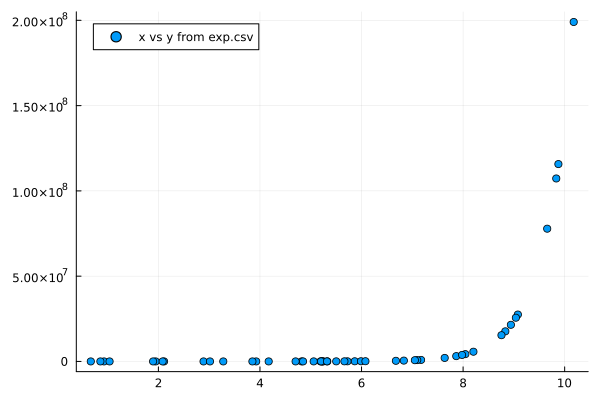

In [50]:
xy = Matrix(df)
scatter(xy[:, 1], xy[:, 2], label="x vs y from exp.csv")

# Step 1: Data Transformation 

1. create new data column $ z_i  = log(y_i), i = 1, 2, ..., 50 $
2. Then the relationship between $ x_i $ and $z_i $ is $ z_i = log(c) + a*x_i $
3. Now the problem of finding the " best " curve $ y = c*e^{ax} $ is equivalent to finding the "best" line $ z = ax + b, b = log(c)$ 

In [46]:
x = xy[:, 1]
y = xy[:, 2]
z = log.(y)

50-element Vector{Float64}:
  4.282057888350212
  7.854131332851355
  2.2362277344773682
 16.68553442936732
  9.465613197672917
 13.69867620125458
  9.515269040889317
 15.268493075722928
 10.136245203899312
  4.595414338237713
  ⋮
  6.2150863966177505
 10.364451005697477
 11.726524886159018
  7.72129997848184
 17.059357120309638
 15.15252959364631
 18.169996621702413
 10.982394306746674
  6.687917209197518

## Step 2: Find the "best" line z = ax + b

Finding the "best" line $ z = ax + b $ means finding the "best" coefficients "a" and "b" for that line that fit the data well

One way to find the "best" coefficients "a" and "b" is to minimize the sum of square of the errors

1. each error is the difference between $ \hat{z}_i = log(y_i) $ and the fitted value producing by the model $\hat{z_i} = a*x_i + b$
2. sum of square of the errors is $E(a, b) = \sum_{i=1}^{50}[z_i - (a*x_i + b)]^2$

To minimize $ E(a, b) $, first take the partial derivatives, set them to zero, to find critical points

\begin{align}
    \frac{\partial E}{\partial a} = \sum_{i=1}^{50} 2*(z_i - (a*x_i + b)) * {-x_i} = 0 \\
    \frac{\partial E}{\partial b} = \sum_{i=1}^{50} 2*(z_i - (a*x_i + b)) * (-1) = 0 
\end{align}

to find critical points (a,b) dividing both *above* by 2, then solve for a and b
\begin{align} 
    \sum_{i=1}^{50}[z_i-(a*x_i)+b] * (-x_i) = 0 \\
    \sum_{i=1}^{50}[z_i-(a*x_i)+b] * (-1) = 0 \\
    <=> \\
    \sum_{i=1}^{50}[-z_i*x_i+(a*x_i^2+b*x_i)] = 0 \\
    \sum_{i=1}^{50}[-z_i*+(a*x_i+b*1)] = 0 \\
    <=> \\
    \sum_{i=1}^{50}x_i^2*a+\sum_{i=1}^{50}x_i*b = \sum_{i=1}^{50}x_i*z_i \\
    \sum_{i=1}^{50}a*x_i+\sum_{i=1}^{50}b*1=\sum_{i=1}^{50}z_i \\
\end{align}

The critical point (a, b) is the solution to the system of 2 equations (7) and (8). I.e.

\begin{align}
\begin{bmatrix}
    \sum_{i=1}^{50}x_i^2 & \sum_{i=1}^{50}x_i \\
    \sum_{i=1}^{50}x_i & \sum_{i=1}^{50}1 \\
\end{bmatrix}
*
\begin{bmatrix}
    a \\
    b 
\end{bmatrix}
=
\begin{bmatrix}
    \sum_{i=1}^{50}x_i*z_i \\
    \sum_{i=1}^{50}z_i
\end{bmatrix}
\end{align}





In [47]:
Y = [sum(x.*z); sum(z)]
println("Y =", Y)
M = [sum(x.^2) sum(x); sum(x) 50]

Y =[3702.3653368272617, 547.5039354425655]


2×2 Matrix{Float64}:
 1933.29  282.41
  282.41   50.0

In [48]:
ab = M \ Y
a = ab[1]
b = ab[2]

using Printf 
@printf("Critical point (a, b) = (%.3f, %.3f) \n", a, b)
1933.2879*50-282.41^2

Critical point (a, b) = (1.804, 0.763) 


16908.98689999999

To determine if critical point (a, b) = (0.008, 10.906) is the max or the min, we take the second partial derivatives
\begin{align}
A = \frac{\partial^{2}E}{\partial a^{2}} = \frac{\partial}{\partial a}(\sum_{i=1}^{50}x_i^2*a + \sum_{i=1}^{50}x_i*b - \sum_{i=1}^{50}x_i*z_i)\\
B = \frac{\partial^{2}E}{\partial a\partial b} = \frac{\partial}{\partial b}(\sum_{i=1}^{50}x_i^2*a + \sum_{i=1}^{50}x_i*b - \sum_{i=1}^{50}x_i*z_i) \\ 
C = \frac{\partial^{2}E}{\partial b^{2}} = \frac{\partial}{\partial a}(\sum_{i=1}^{50}x_i*a + \sum_{i=1}^{50}1*b - \sum_{i=1}^{50}z_i) \\
<=> \\
A = \sum_{i=1}^{50}x_i^2 = 1933.28797
B = \sum_{i=1}^{50} x_i = 282.41
C = \sum_{i=1}^{50} 1 = 50
A*C - B^2 = 1933.2879 * 50 - 282.41^2 = 16909 > 0
A = 1933.2879 > 0
\end{align}

Because $ A*C - B^2 > 0 $ and $A > 0 $, the error function $ E(a, b) = \sum_{i=1}^{50}[z_i - (a*x_i+b)]^2 $ evaluated at (a, b) = (1.804, 0.763) is the minimum, per second derivative test 

Hence the line $ z = ax + b $ = 1.804*x + 0.763 $ "best" fit the log data $ (z_1, z_2, ..., z_{50}) $

$ b = \ln(c) => e^b = e^{0.763} = 2.145 $

$ z = \ln(y) $ thus equivalently $ y = c*e^{ax} = 2.145 * e^{1.804*x}  $ is the best exponential curve that fit the original data in exp.csv

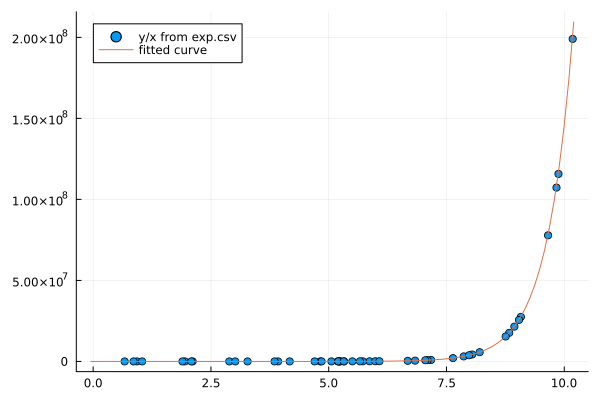

In [58]:
scatter(xy[:, 1], xy[:, 2], label="y/x from exp.csv")

x = range(-0.05, 10.2, length = 100)
y = 2.145*exp.(a*x)
plot!(x, y, label="fitted curve")